# Practical Machine Learning

## Preprocessing the Dataset

In [7]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

#load data
documents = pd.read_csv(r"C:\Users\Asus\Desktop\pml\Reviews.csv")
#ignore columns we won't use
#keep only the review's text and the name of the review's author
documents = documents.drop(columns=['Id','ProductId', 'UserId', 'HelpfulnessNumerator','HelpfulnessDenominator',
                                   'Score','Time','Summary'], axis=1)

#we use a subset of reviewers with more than 200 reviews each - as recommended in your email
df = pd.DataFrame(documents)
df = df[df.groupby('ProfileName')['ProfileName'].transform('size') > 200]

#text preprocessing: remove punctuation, lemmatize, remove stopwords

w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words("english"))   

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['ProfileName'] = df['ProfileName'].str.replace('[^\w\s]','').str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]','').str.lower()
df['Text'] = df['Text'].str.replace(r'\b\w{1,3}\b', '')
df['Text'] = df['Text'].apply(lemmatize_text)
df['Text'] = df['Text'].apply(lambda x: [item for item in x if item not in stop])
df.to_csv(r"C:\Users\Asus\Desktop\pml\ProcessedReviews.csv")

## Multinomial Naive Bayes 

In [2]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Asus\Desktop\pml\ProcessedReviews.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# examine the class distribution - 23 classes
idx = pd.Index(data['ProfileName'])
idx.value_counts() 

c f hill cfh                            451
o brown ms o khannahbrown               421
gary peterson                           389
rebecca of amazon the rebecca review    365
chris                                   363
linda                                   290
john                                    261
mike                                    260
c2                                      256
laura                                   253
sarah                                   244
stephanie                               240
karen                                   239
lisa                                    237
jessica                                 236
jen                                     232
steve                                   225
david                                   216
anonymous                               213
mary                                    208
gunner                                  207
amanda                                  202
lynrie oh hell no               

['presently', 'diet', 'fresh', 'easy', 'neighborhood', 'grocery', 'looking', 'possible', 'diet', 'food', 'wanted', 'thing', 'tasty', 'nonfat', 'calorie', 'came', 'home', 'dozen', 'item', 'thats', 'discovered', 'tillen', 'farm', 'pickled', 'crispy', 'asparagus', 'well', 'always', 'liked', 'asparagus', 'anyway', 'enjoyed', 'several', 'brand', 'pickled', 'asparagus', 'tillen', 'farm', 'brand', 'really', 'really', 'good', 'best', 'recall', 'excellent', 'flavor', 'clove', 'garlic', 'bottom', 'looking', 'forward', 'eating', 'cant', 'believe', 'good', 'asparagus', 'taste', 'right', 'front', 'say', 'calorie', 'idea', 'good', 'diet', 'foodbr', 'gary', 'peterson']
gary peterson


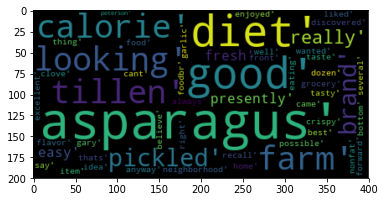

In [4]:
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#label encoding of the 23 classes present
#LabelEncoder encodes labels with a value between 0 and n_classes-1
y = data['ProfileName']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
X = data['Text']

#vizualise text using wordclouds
wordcloud = WordCloud().generate(X[2])
print(X[2])
print(data['ProfileName'][2])
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the processed reviews
bow_transformer=CountVectorizer().fit(X_train)
# transforming test and train data using Bag of Words
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
# training the model
%time model = model.fit(text_bow_train, y_train)

#training & validation accuracy
print(model.score(text_bow_train, y_train))
print(model.score(text_bow_test, y_test))

Wall time: 22 ms
0.8069257096839139
0.604669887278583


In [18]:
from sklearn.metrics import classification_report
predictions = model.predict(text_bow_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.48      0.59        46
           1       0.52      0.28      0.36        43
           2       0.64      0.95      0.77        82
           3       0.54      1.00      0.70        52
           4       0.30      0.52      0.38        60
           5       0.67      0.32      0.44        37
           6       0.43      1.00      0.61        76
           7       1.00      0.90      0.95        41
           8       0.57      0.44      0.50        45
           9       0.53      0.39      0.45        49
          10       0.70      0.44      0.54        52
          11       0.56      0.27      0.36        37
          12       0.54      0.49      0.52        51
          13       0.86      0.39      0.53        62
          14       0.78      0.35      0.48        40
          15       0.80      0.80      0.80        46
          16       0.31      0.13      0.18        39
          17       0.70    

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
%time logreg.fit(text_bow_train, y_train)
#training & validation accuracy
print(logreg.score(text_bow_train, y_train))
print(logreg.score(text_bow_test, y_test))

Wall time: 2.95 s
0.9985906986108315
0.6626409017713365


In [15]:
from sklearn.metrics import classification_report
predictions1 = logreg.predict(text_bow_test)
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        46
           1       0.41      0.30      0.35        43
           2       1.00      0.98      0.99        82
           3       0.96      0.98      0.97        52
           4       0.43      0.55      0.49        60
           5       0.54      0.38      0.44        37
           6       1.00      1.00      1.00        76
           7       1.00      0.95      0.97        41
           8       0.35      0.42      0.38        45
           9       0.49      0.49      0.49        49
          10       0.48      0.46      0.47        52
          11       0.35      0.35      0.35        37
          12       0.61      0.59      0.60        51
          13       0.54      0.60      0.56        62
          14       0.33      0.50      0.40        40
          15       0.97      0.63      0.76        46
          16       0.35      0.31      0.33        39
          17       0.52    

## McNemar's Test

chi-squared: 42.720338983050844
p-value: 6.315223437896285e-11


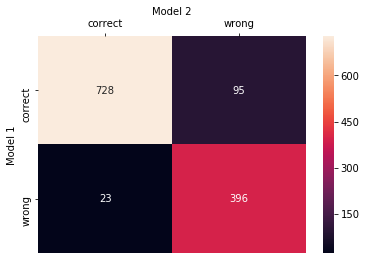

In [51]:
import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(text_bow_test)
predictions1 = logreg.predict(text_bow_test)
# The correct target (class) labels
y_target = np.array(y_test)

# Class labels predicted by model 1
y_model1 = np.array(predictions)

# Class labels predicted by model 2
y_model2 = np.array(predictions1)

tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)  

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

ax=plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); 
ax.xaxis.set_label_position('top') 
ax.set_xlabel('Model 2');ax.set_ylabel('Model 1');  
ax.xaxis.set_ticks_position('top');
ax.xaxis.set_ticklabels(['correct', 'wrong']); ax.yaxis.set_ticklabels(['correct', 'wrong']);

